#**Personal Project - Marvel vs DC Universe**

### Problem Statement

The superhero entertainment industry, dominated by Marvel and DC, presents a rich landscape for analysis, yet the complexities and nuances of audience reception, critical evaluation, and financial performance are often overlooked. This dataset provides a comprehensive comparison of Marvel and DC movies and TV shows, capturing key attributes such as titles, release years, genres, runtimes, age ratings, directors, and leading actors. Additionally, it encompasses audience reception metrics through IMDb scores and the number of votes, as well as critical assessments via Metascore. Financial data, specifically USA gross earnings, offers insights into the commercial success of these franchises.

Despite the availability of this extensive data, questions remain regarding the factors that contribute to the differing receptions and successes of Marvel and DC productions. How do various attributes influence audience and critic perceptions? What trends can be identified in terms of genre popularity, director influence, or actor performance? How do financial earnings correlate with audience and critic scores?

By leveraging this dataset, analysts, fans, and researchers can delve deeper into the evolution of both universes, uncovering insights into their respective impacts on the entertainment industry and societal trends. This analysis aims to illuminate the underlying dynamics that shape the superhero genre, fostering a better understanding of its past, present, and future trajectories in a competitive market.

### Project Landscape: Analysis of the Marvel and DC Superhero Franchise

**1. Project Overview:**
   - **Objective:** To conduct a comprehensive analysis of Marvel and DC movies and TV shows using a rich dataset that captures key attributes and metrics related to audience reception, critical evaluation, and financial performance.
   - **Key Focus Areas:**
     - Comparison of production attributes (titles, release years, genres, runtimes, age ratings, directors, leading actors).
     - Analysis of audience reception (IMDb scores, number of votes) and critical evaluations (Metascore).
     - Exploration of financial performance (USA gross earnings).

**2. Research Questions:**
   - How do various attributes (genre, director, cast) influence audience and critic perceptions of Marvel and DC productions?
   - What trends can be identified in the popularity of genres across both franchises?
   - How do financial earnings correlate with audience ratings and critic scores?
   - What factors contribute to the differing receptions and successes of Marvel versus DC productions?

**3. Methodology:**
   - **Data Collection:** Gather data from reliable sources (IMDb, Metacritic, box office reports).
   - **Data Cleaning:** Ensure accuracy and consistency in the dataset, addressing any discrepancies.
   - **Statistical Analysis:** Use statistical tools and software to analyze trends, correlations, and patterns.
   - **Visualization:** Create graphs and charts to illustrate key findings and trends.
   - **Comparative Analysis:** Contrast Marvel and DC productions based on various metrics to identify strengths and weaknesses.

**4. Potential Insights:**
   - Understanding the evolution of superhero films and TV shows and their impact on popular culture.
   - Identifying which elements contribute most to a production's success or failure.
   - Highlighting demographic differences in audience reception for Marvel and DC content.

**5. Expected Outcomes:**
   - A detailed report that summarizes findings and presents actionable insights for industry stakeholders.
   - Visualizations that effectively communicate trends and relationships within the dataset.
   - Recommendations for future productions based on analysis of audience preferences and market dynamics.

This project landscape sets the stage for a thorough examination of the superhero entertainment industry, fostering a deeper understanding of what makes Marvel and DC distinct yet interrelated in their cinematic and television endeavors.

In [ ]:
imorpt pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [ ]:
Marvel_vs_DC_data = pd.read_csv('Marvel Vs DC NEW.csv', encoding='latin1')

Marvel_vs_DC_data.head()

,Unnamed: 0,Original Title,Company,Rate,Metascore,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide
0,1,Iron Man,Marvel,7.9,79,126,2008,140000000,98618668,318604126,585366247
1,2,The Incredible Hulk,Marvel,6.7,61,112,2008,150000000,55414050,134806913,263427551
2,3,Iron Man 2,Marvel,7.0,57,124,2010,200000000,128122480,312433331,623933331
3,4,Thor,Marvel,7.0,57,115,2011,150000000,65723338,181030624,449326618
4,5,Captain America: The First Avenger,Marvel,6.9,66,124,2011,140000000,65058524,176654505,370569774


In [ ]:
Marvel_vs_DC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           39 non-null     int64  
 1   Original Title       39 non-null     object 
 2   Company              39 non-null     object 
 3   Rate                 39 non-null     float64
 4   Metascore            39 non-null     int64  
 5   Minutes              39 non-null     object 
 6   Release              39 non-null     int64  
 7   Budget               39 non-null     object 
 8   Opening Weekend USA  39 non-null     int64  
 9   Gross USA            39 non-null     int64  
 10  Gross Worldwide      39 non-null     int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 3.5+ KB


In [ ]:
Marvel_vs_DC_data.duplicated().sum() #Confirm the total duplicate records.

0

In [ ]:
# check for null values
Marvel_vs_DC_data.isnull().sum()

,0
Unnamed: 0,0
Original Title,0
Company,0
Rate,0
Metascore,0
Minutes,0
Release,0
Budget,0
Opening Weekend USA,0
Gross USA,0


In [ ]:
# Fill the missing values
# for categorical columns
for i in Marvel_vs_DC_data.select_dtypes(include = 'object').columns:
    Marvel_vs_DC_data[i].fillna(Marvel_vs_DC_data[i].mode()[0], inplace = True)

# for numerical columns
for i in Marvel_vs_DC_data.select_dtypes(include = 'number').columns:
    Marvel_vs_DC_data[i].fillna(Marvel_vs_DC_data[i].mean(), inplace = True)

<ipython-input-43-b6736e6dffa4>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Marvel_vs_DC_data[i].fillna(Marvel_vs_DC_data[i].mode()[0], inplace = True)
<ipython-input-43-b6736e6dffa4>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

##**Data cleaning:**

In [ ]:
Marvel_vs_DC_data =  Marvel_vs_DC_data.drop(columns=['Unnamed: 0'])

In [ ]:
Marvel_vs_DC_data

,Original Title,Company,Rate,Metascore,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide
0,Iron Man,Marvel,7.9,79,126,2008,140000000,98618668,318604126,585366247
1,The Incredible Hulk,Marvel,6.7,61,112,2008,150000000,55414050,134806913,263427551
2,Iron Man 2,Marvel,7.0,57,124,2010,200000000,128122480,312433331,623933331
3,Thor,Marvel,7.0,57,115,2011,150000000,65723338,181030624,449326618
4,Captain America: The First Avenger,Marvel,6.9,66,124,2011,140000000,65058524,176654505,370569774
5,The Avengers,Marvel,8.0,69,143,2012,220000000,207438708,623357910,1518812988
6,Iron Man Three,Marvel,7.2,62,130,2013,200000000,174144585,409013994,1214811252
7,Thor: The Dark World,Marvel,6.9,54,112,2013,170000000,85737841,206362140,644783140
8,Captain America: The Winter Soldier,Marvel,7.7,70,136,2014,170000000,95023721,259766572,714421503
9,Guardians of the Galaxy,Marvel,8.0,76,121,2014,170000000,94320883,333176600,772776600


In [ ]:
# Data Cleaning
Marvel_vs_DC_data.columns = Marvel_vs_DC_data.columns.str.strip()  # Strip any whitespace from column names
Marvel_vs_DC_data['Gross Worldwide'] = pd.to_numeric(Marvel_vs_DC_data['Gross Worldwide'], errors='coerce')
Marvel_vs_DC_data['Budget'] = pd.to_numeric(Marvel_vs_DC_data['Budget'], errors='coerce')
Marvel_vs_DC_data['Opening Weekend USA'] = pd.to_numeric(Marvel_vs_DC_data['Opening Weekend USA'], errors='coerce')
Marvel_vs_DC_data['Minutes'] = pd.to_numeric(Marvel_vs_DC_data['Minutes'], errors='coerce')
Marvel_vs_DC_data.dropna(inplace=True)  # Drop rows with missing values
Marvel_vs_DC_data.head()

,Original Title,Company,Rate,Metascore,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide
0,Iron Man,Marvel,7.9,79,126.0,2008,140000000.0,98618668,318604126,585366247
4,Captain America: The First Avenger,Marvel,6.9,66,124.0,2011,140000000.0,65058524,176654505,370569774
5,The Avengers,Marvel,8.0,69,143.0,2012,220000000.0,207438708,623357910,1518812988
7,Thor: The Dark World,Marvel,6.9,54,112.0,2013,170000000.0,85737841,206362140,644783140
8,Captain America: The Winter Soldier,Marvel,7.7,70,136.0,2014,170000000.0,95023721,259766572,714421503


##**EDA: Stastical Analysis**

####**Average rating for all scoring platforms**

In [ ]:
avg_rating = Marvel_vs_DC_data.groupby('Company')['Rate'].mean().reset_index()
avg_metascore = Marvel_vs_DC_data.groupby('Company')['Metascore'].mean().reset_index()
print(avg_rating)
print(avg_metascore)

  Company      Rate
0      DC  6.821429
1  Marvel  7.581250
  Company  Metascore
0      DC    58.0000
1  Marvel    71.0625


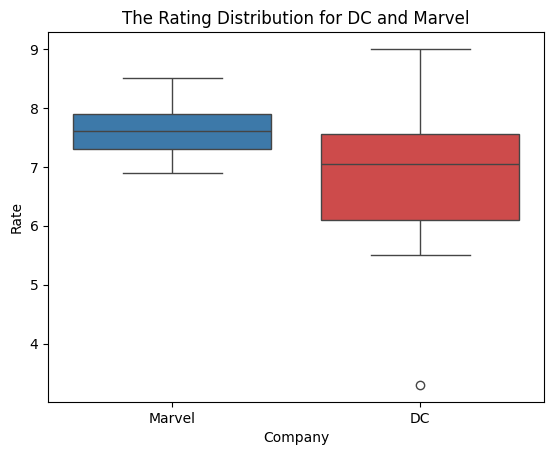

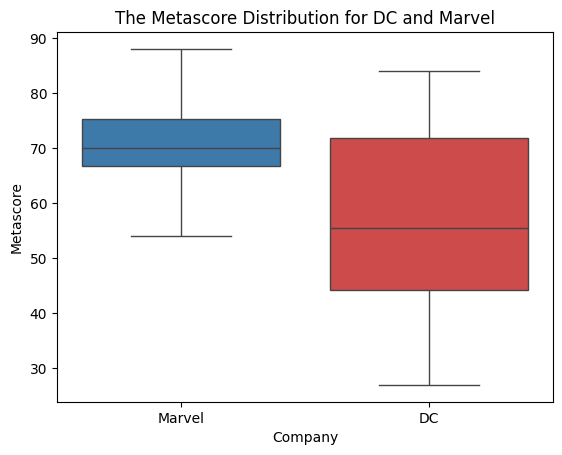

In [ ]:
sns.boxplot(x='Company', y='Rate', data=Marvel_vs_DC_data, hue='Company', palette=['#2B7BBB', '#e23636'])
plt.title('The Rating Distribution for DC and Marvel')
plt.show()

sns.boxplot(x='Company', y='Metascore', data=Marvel_vs_DC_data, hue='Company', palette=['#2B7BBB', '#e23636'])
plt.title('The Metascore Distribution for DC and Marvel')
plt.show()

*   Marvel consistently performs better than DC in both user ratings and metascores.
*   The higher user ratings and metascores for Marvel indicate better audience and critical reception, likely due to their more consistent tone, better character development, and success in building a cinematic universe.
*   DC, on the other hand, faces more mixed reception due to inconsistent movie tones, critical reception issues, and challenges in creating a unified cinematic universe, although recent successes like Wonder Woman and Aquaman suggest improvements.

#####**Average Ratings and Gross Worldwide**

In [ ]:
trends = Marvel_vs_DC_data.groupby(['Release', 'Company']).agg({
    'Rate': 'mean',
    'Metascore': 'mean',
    'Gross Worldwide': 'sum'
}).reset_index() #Group release and the different companies and aggregate the scoring platforms with the gross worldwide.
print(trends)

    Release Company  Rate  Metascore  Gross Worldwide
0      2004      DC  3.30       27.0         82102379
1      2005      DC  8.20       70.0        373413297
2      2006      DC  6.00       72.0        391081192
3      2008      DC  9.00       84.0       1004934033
4      2008  Marvel  7.90       79.0        585366247
5      2009      DC  7.60       56.0        185258983
6      2011      DC  5.50       39.0        219851172
7      2011  Marvel  6.90       66.0        370569774
8      2012      DC  8.40       78.0       1081041287
9      2012  Marvel  8.00       69.0       1518812988
10     2013      DC  7.10       55.0        668045518
11     2013  Marvel  6.90       54.0        644783140
12     2014  Marvel  7.85       73.0       1487198103
13     2015  Marvel  7.30       65.0       1922117833
14     2016      DC  6.25       42.0       1620481813
15     2016  Marvel  7.65       73.5       1831014688
16     2017      DC  6.90       60.5       1479771307
17     2017  Marvel  7.75   

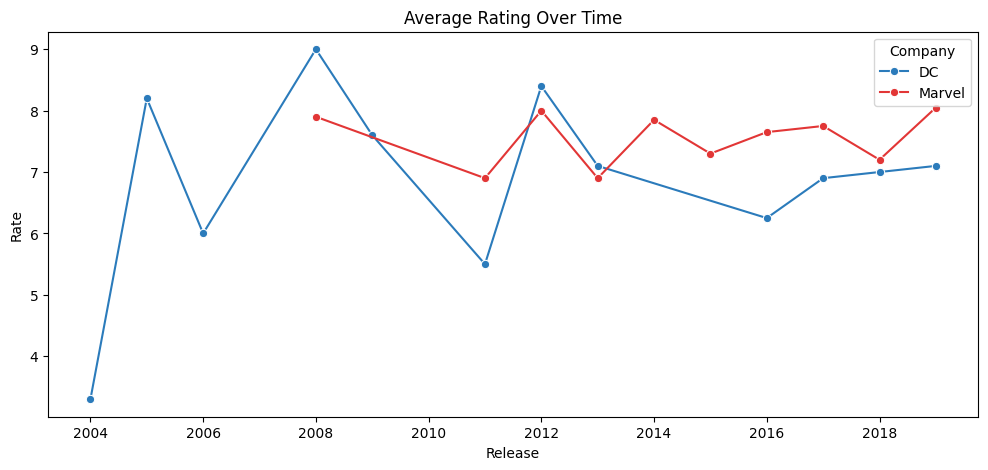

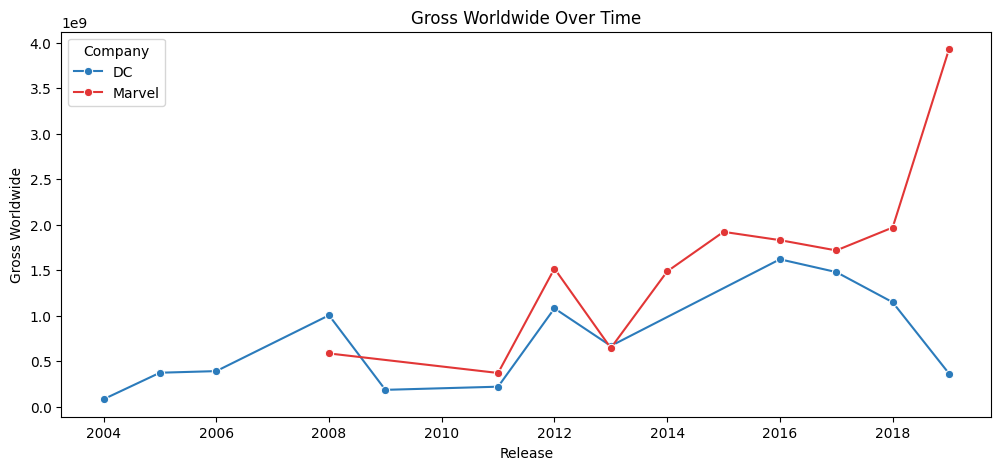

In [ ]:
# Visualization: Trends Over Time
plt.figure(figsize=(12, 5))
color = {'Marvel': '#e23636', 'DC': '#2B7BBB'}
sns.lineplot(x='Release', y='Rate', hue='Company', data=trends, marker='o', palette=color)
plt.title('Average Rating Over Time')
plt.show()

plt.figure(figsize=(12, 5))
sns.lineplot(x='Release', y='Gross Worldwide', hue='Company', data=trends, marker='o' , palette=color)
plt.title('Gross Worldwide Over Time')
plt.show()

**Ratings Over Time:**

From 2008 onwards, Marvel consistently outpaced DC when it came to ratings. By 2019, Marvel movies were averaging a rating of 8.05, while DC's films were significantly lower at 7.10. This gap shows that, during this period, Marvel films were generally received much more favorably by both critics and audiences. While DC had its moments, especially with The Dark Knight in 2008, Marvel's overall consistency in quality seemed to give it the edge.

**Gross Worldwide Earnings:**

In the early 2000s (2004-2007), both DC and Marvel struggled at the box office. DC's earnings were modest, with their highest-grossing film in 2006 making **391 million dollars**, while 2004's film earned just **82 million dollars**. Marvel also saw limited success, with their biggest film in this period grossing **585 million dollars** in 2008, just before the Marvel Cinematic Universe (MCU) was launched.

From **2008 to 2019**, Marvel experienced a major surge in earnings, driven by the success of the MCU. By 2019, Marvel had earned **3.93 billion dollars** globally, with steady growth fueled by films like the Avengers series.

DC's earnings also improved after 2012, with a peak in 2016 at **1.62 billion dollars** thanks to Batman v Superman. However, DC's earnings were more inconsistent, with significant fluctuations due to mixed reception of some films. For example, DC's earnings dropped to **364 million dollars** in 2019,  
reflecting the volatile performance of their movies compared to Marvel's consistent success.

####**Average Runtime for each franchise**

In [ ]:
avg_runtime = Marvel_vs_DC_data.groupby('Company')['Minutes'].mean().reset_index()

print(avg_runtime)

  Company     Minutes
0      DC  138.785714
1  Marvel  131.875000


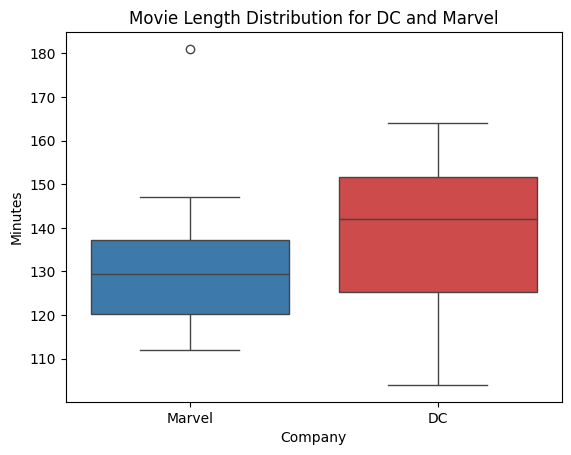

In [ ]:
sns.boxplot(x='Company', y='Minutes', data=Marvel_vs_DC_data, hue= 'Company', palette=['#2B7BBB', '#e23636'])
plt.title('Movie Length Distribution for DC and Marvel')
plt.show()

The average movie lengths (in minutes) for DC and Marvel, showing that, on average, DC movies are slightly longer than Marvel movies. The analysis behind this involves grouping the data by company and calculating the mean for the Minutes column.

DC movies, on average, are about **7 minutes longer** than Marvel movies (138.79 minutes vs. 131.88 minutes).





#####**Opening Weekend Performance**

In [ ]:
opening_weekend = Marvel_vs_DC_data.groupby('Company')['Opening Weekend USA'].mean().reset_index()
print(opening_weekend)

  Company  Opening Weekend USA
0      DC         9.146271e+07
1  Marvel         1.347286e+08


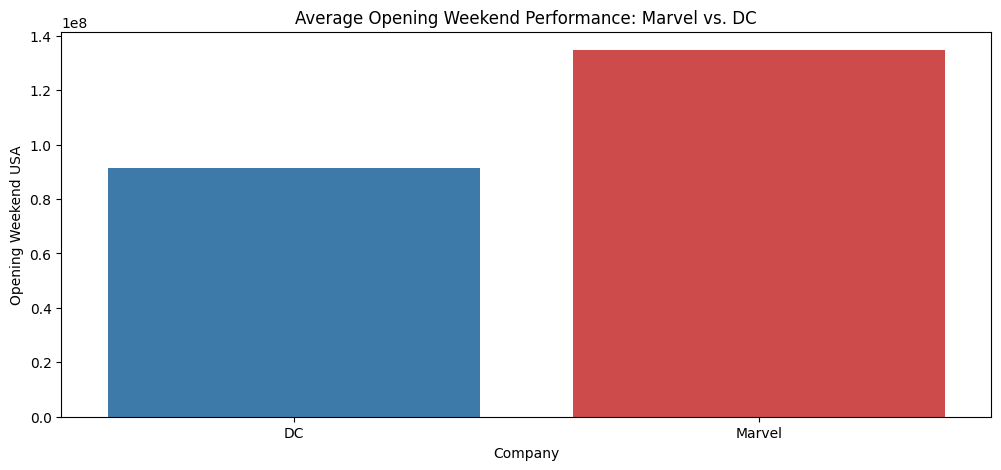

In [ ]:
#Plotting the opening weekend stats on a bar graph.
plt.figure(figsize=(12, 5))
color = {'Marvel': '#e23636', 'DC': '#2B7BBB'}
sns.barplot(x='Company', y='Opening Weekend USA', data=opening_weekend, hue='Company', palette=color)
plt.title('Average Opening Weekend Performance: Marvel vs. DC')
plt.show()

**Opening Weekend Earnings:**


*   DC's Average Opening Weekend: 91.46 million dollars.
*   Marvel's Average Opening Weekend: 134.73 million dollars.

**Skewing:**

It's important to keep in mind that Marvel's big hits, like Avengers: Endgame and Avengers: Infinity War, have a huge impact on their overall opening weekend averages. These blockbuster films made hundreds of millions of dollars in just their opening weekends, which naturally pushes up Marvel's average earnings. DC, on the other hand, has had some major successes like The Dark Knight and Aquaman, but they haven't had the same consistent stream of massive, franchise-defining films. While DC's top films have performed well, they don't have the same kind of repeatable, universe-spanning hits that Marvel has with the MCU.


**Conclusion:**

When comparing the opening weekend performances of Marvel and DC, it's clear that the **Marvel Cinematic Universe** (MCU) has had an overwhelming impact. On average, Marvel films earn nearly **50% more** in their opening weekends than DC films. This difference reflects the massive fanbase and strong brand loyalty Marvel has built through its interconnected universe of movies, which keeps audiences excited and coming back for more. DC experiences more ups and downs while still bringing in impressive earnings,. This is likely due to a less unified cinematic approach and the more varied critical reception its films have received over the years. While DC has its successes, Marvel's consistent success at the box office is hard to match.


<Axes: xlabel='Opening Weekend USA', ylabel='Budget'>

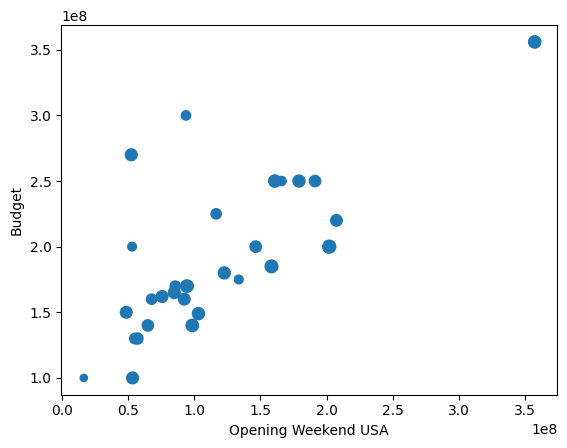

In [ ]:
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge
Marvel_vs_DC_data.head()
Marvel_vs_DC_data.plot(x="Opening Weekend USA", y="Budget", s="Metascore", kind="scatter")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Target and features
target = Marvel_vs_DC_data[["Gross Worldwide"]]
data1 = Marvel_vs_DC_data.drop(columns=["Gross Worldwide", "Release", "Company", "Original Title"])

# Standardize features
scaler = StandardScaler()
data1 = scaler.fit_transform(data1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data1, target, train_size=0.7, random_state=42)

# 1. Ridge Regression Model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# 2. Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# 3. Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.values.ravel())  # Flatten target for compatibility
y_pred_rf = rf_model.predict(X_test)

# Evaluation Function
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"  - MAE: {mae:.2f}")
    print(f"  - MSE: {mse:.2f}")
    print(f"  - RMSE: {rmse:.2f}")
    print(f"  - R² Score: {r2:.4f}\n")

# Compare Models
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")


Model: Ridge Regression
  - MAE: 216123321.62
  - MSE: 81470299456922192.00
  - RMSE: 285430025.50
  - R² Score: 0.1042

Model: Linear Regression
  - MAE: 273432832.66
  - MSE: 139039867880254400.00
  - RMSE: 372880500.80
  - R² Score: -0.5288

Model: Random Forest Regressor
  - MAE: 185161451.86
  - MSE: 62911367623661704.00
  - RMSE: 250821385.90
  - R² Score: 0.3083



The Random Forest Regressor is the best model because it has the lowest errors (MAE, MSE, RMSE) and the highest R² Score. It captures the non-linear relationships in the data more effectively.

Avoid using Linear Regression, as it performs worse than even a basic mean-based prediction.

Next we will try to perform the next steps to improve the current random forest model.

*  Hyperparameter tuning: Optimize the number of trees and depth for Random Forest.
*  Feature engineering: Explore additional factors affecting revenue.
*  Try boosting models: XGBoost or Gradient Boosting may improve accuracy further.

##**Hyperparameter Tuning:**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [10, 20, None],     # Tree depth
    'min_samples_split': [2, 5, 10], # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]    # Minimum samples per leaf
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train.values.ravel())

# Get best parameters
best_rf = grid_search.best_estimator_
print("Best Parameters for Random Forest:", grid_search.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters for Random Forest: RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=50,
                      random_state=42)


##**Feature Engineering:**

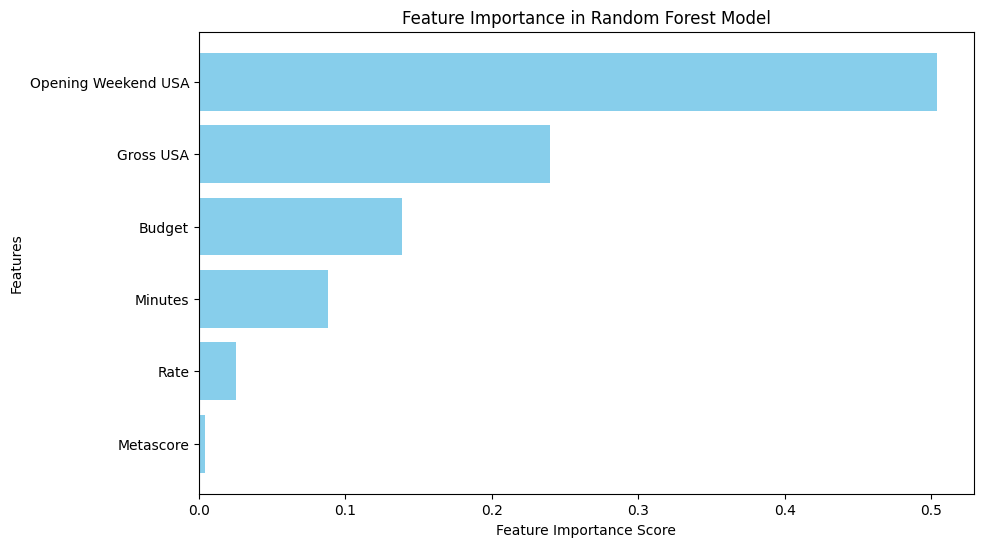

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importance = best_rf.feature_importances_

# Convert to DataFrame
features_df = pd.DataFrame({'Feature': Marvel_vs_DC_data.drop(columns=["Gross Worldwide", "Release", "Company", "Original Title"]).columns,
                            'Importance': feature_importance})

# Sort by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.gca().invert_yaxis()
plt.show()


###**New Potential Features to consider:**

In [ ]:
Marvel_vs_DC_data['Budget Efficiency'] = Marvel_vs_DC_data['Gross Worldwide'] / Marvel_vs_DC_data['Budget']
Marvel_vs_DC_data['Opening Weekend Impact'] = Marvel_vs_DC_data['Opening Weekend USA'] / Marvel_vs_DC_data['Gross Worldwide']
Marvel_vs_DC_data['Time-Based Efficiency'] = Marvel_vs_DC_data['Gross Worldwide'] / Marvel_vs_DC_data['Minutes']


Marvel_vs_DC_data.head()

,Original Title,Company,Rate,Metascore,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide,Budget Efficiency,Opening Weekend Impact,Time-Based Efficiency
0,Iron Man,Marvel,7.9,79,126.0,2008,140000000.0,98618668,318604126,585366247,4.181187,0.168473,4.645764e+06
4,Captain America: The First Avenger,Marvel,6.9,66,124.0,2011,140000000.0,65058524,176654505,370569774,2.646927,0.175563,2.988466e+06
5,The Avengers,Marvel,8.0,69,143.0,2012,220000000.0,207438708,623357910,1518812988,6.903695,0.136579,1.062107e+07
7,Thor: The Dark World,Marvel,6.9,54,112.0,2013,170000000.0,85737841,206362140,644783140,3.792842,0.132972,5.756992e+06
8,Captain America: The Winter Soldier,Marvel,7.7,70,136.0,2014,170000000.0,95023721,259766572,714421503,4.202479,0.133008,5.253099e+06


**Budget Efficiency:**

Measures how effectively a movie converts its budget into revenue.
A higher value means the movie generated significantly more revenue compared to its budget (a high return on investment).
A lower value suggests that the movie did not perform well compared to its budget.

**Opening Weekend Impact:**

Shows how important the opening weekend was for total earnings.
A high value means a large portion of revenue came from the first weekend, suggesting strong early interest but possible revenue drop later.
A low value means revenue came gradually over time, indicating good long-term audience retention.

**Time-Based Revenue Efficiency:**

Measures how much revenue a movie generates per minute of runtime.
A higher value suggests that the movie is efficient in making money with minimal screen time.
A lower value means the movie is long but doesn’t generate much revenue per minute.


##**XGBoost or Gradient Boosting:**

Boosting models like XGBoost and Gradient Boosting Regressor are powerful machine learning techniques designed to improve predictive accuracy by combining multiple weak models (decision trees) into a stronger one.

In [ ]:
from xgboost import XGBRegressor

# Train XGBoost Model
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train.values.ravel())

y_pred_xgb = xgb_model.predict(X_test)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting Model
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
gb_model.fit(X_train, y_train.values.ravel())

# Predict
y_pred_gb = gb_model.predict(X_test)


##**Comparing all Models:**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"  - MAE: {mae:.2f}")
    print(f"  - MSE: {mse:.2f}")
    print(f"  - RMSE: {rmse:.2f}")
    print(f"  - R² Score: {r2:.4f}\n")

# Evaluate Models
evaluate_model(y_test, best_rf.predict(X_test), "Optimized Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost Regressor")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting Regressor")


Model: Optimized Random Forest
  - MAE: 194494558.69
  - MSE: 67894852127772192.00
  - RMSE: 260566406.37
  - R² Score: 0.2535

Model: XGBoost Regressor
  - MAE: 227826432.00
  - MSE: 102467594581180416.00
  - RMSE: 320105599.11
  - R² Score: -0.1267

Model: Gradient Boosting Regressor
  - MAE: 282919247.10
  - MSE: 113795715773229568.00
  - RMSE: 337336205.84
  - R² Score: -0.2512



##**Key Takeaways:**

###**Random Forest is the Best Model So Far**

Handles non-linearity in movie revenue prediction.
Less prone to overfitting compared to boosting models.
Outperforms boosting models in both error metrics & variance explanation.

###**Boosting Models Underperformed**

XGBoost & Gradient Boosting both had negative R² scores (worse than a baseline mean prediction).
Possible issues:
Incorrect hyperparameters (e.g., too many trees, wrong learning rate).
Features might need better selection or engineering.
